<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Orders-table" data-toc-modified-id="Orders-table-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Orders table</a></span></li><li><span><a href="#Order_products-table" data-toc-modified-id="Order_products-table-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Order_products table</a></span></li><li><span><a href="#Products-table" data-toc-modified-id="Products-table-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Products table</a></span></li><li><span><a href="#Aisles-table" data-toc-modified-id="Aisles-table-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Aisles table</a></span></li><li><span><a href="#Departments-table" data-toc-modified-id="Departments-table-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Departments table</a></span></li></ul></li></ul></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Analyses" data-toc-modified-id="Analyses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyses</a></span><ul class="toc-item"><li><span><a href="#Quick-and-easy" data-toc-modified-id="Quick-and-easy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Quick and easy</a></span><ul class="toc-item"><li><span><a href="#Count-of-unique-users" data-toc-modified-id="Count-of-unique-users-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Count of unique users</a></span></li><li><span><a href="#Busiest-day-of-week" data-toc-modified-id="Busiest-day-of-week-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Busiest day of week</a></span></li><li><span><a href="#Busiest-time-of-day" data-toc-modified-id="Busiest-time-of-day-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Busiest time of day</a></span></li><li><span><a href="#Average-size-of-order-(also-broken-down-by-day/time)" data-toc-modified-id="Average-size-of-order-(also-broken-down-by-day/time)-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Average size of order (also broken down by day/time)</a></span></li><li><span><a href="#Average-%-of-reordered-products-per-order-and-overall" data-toc-modified-id="Average-%-of-reordered-products-per-order-and-overall-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Average % of reordered products per order and overall</a></span></li><li><span><a href="#Most-popular-items-(also-aggregated-by-aisle/dept)" data-toc-modified-id="Most-popular-items-(also-aggregated-by-aisle/dept)-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Most popular items (also aggregated by aisle/dept)</a></span></li><li><span><a href="#Busiest-aisle/dept" data-toc-modified-id="Busiest-aisle/dept-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Busiest aisle/dept</a></span></li></ul></li><li><span><a href="#Hypothesis-tests" data-toc-modified-id="Hypothesis-tests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Hypothesis tests</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Calculate-RFM-values" data-toc-modified-id="Calculate-RFM-values-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Calculate RFM values</a></span></li><li><span><a href="#Test-various-numbers-of-clusters-(elbow-plot)" data-toc-modified-id="Test-various-numbers-of-clusters-(elbow-plot)-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Test various numbers of clusters (elbow plot)</a></span></li><li><span><a href="#Visualize-clusters-with-t-SNE" data-toc-modified-id="Visualize-clusters-with-t-SNE-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Visualize clusters with t-SNE</a></span></li><li><span><a href="#Try-again-with-fewer-features" data-toc-modified-id="Try-again-with-fewer-features-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Try again with fewer features</a></span></li></ul></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

# Introduction

In [36]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import sqlite3
import scipy.stats as stats
from welch_functions import *
from statsmodels.stats.power import TTestIndPower, TTestPower

In [37]:
# Define a function to run Welch's t-test, evaluate and print results
def run_welch(a, b, two_sided=False, alpha=0.05):
    """Perform Welch's t-test and compare p-value to given alpha.
       a: first sample (one-dimensional array)
       b: second sample (one-dimensional array)
       two-sided: whether the t-test should be two-sided or not (boolean)
       alpha: alpha value for comparison with calculated p-value
       
       Dependencies: welch_functions.py"""
    
    # Calculate p-value
    p_value = p_value_welch_ttest(a, b, two_sided=False)
    
    # Evaluate and print results
    if p_value < alpha:
        print('Null hypothesis rejected (p_value = {})'.format(p_value))
    else:
        print('Fail to reject null hypothesis (p_value = {})'.format(p_value)) 
# Define a function to calculate Cohen's d
def cohen_d(sample_a, sample_b):
    """Calculate's Cohen's d for two 1-D arrays"""
    
    diff = abs(np.mean(sample_a) - np.mean(sample_b))
    n1 = len(sample_a) 
    n2 = len(sample_b)
    var1 = np.var(sample_a)
    var2 = np.var(sample_b)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    return d
# Define a function to calculate effect size and power of a statistical test
def size_and_power(sample_a, sample_b, alpha=0.05):
    """Prints raw effect size and power of a statistical test, using 
       Cohen's d (calculated with Satterthwaite approximation)
       Dependencies: Numpy, statsmodels.stats.power.TTestIndPower"""
    
    effect = abs(np.mean(sample_a) - np.mean(sample_b))
    print('Raw effect size:', effect)

    d = cohen_d(sample_a, sample_b)
    print('Cohen\'s d:', d)
    power_analysis = TTestIndPower()
    
    sample_length = (len(sample_a) + len(sample_b)) / 2
    power = power_analysis.solve_power(effect_size=d, alpha=alpha, nobs1=sample_length)
        
    print('Power:', power)

In [2]:
# Set up connection to the database
conn = sqlite3.connect('instacart.db')
cur = conn.cursor()

## EDA

### Orders table

In [3]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM orders
            ;""")
orders = pd.DataFrame(cur.fetchall())
orders.columns = [x[0] for x in cur.description]
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0


In [4]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.147720e+05,414772.000000,414772.000000,414772.000000,414772.000000,389772.000000
mean,1.709159e+06,102336.054370,17.245438,2.771788,13.474299,11.109248
std,9.881692e+05,59647.079832,17.801470,2.046092,4.228616,9.225167
min,2.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.528778e+05,50325.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709380e+06,101745.000000,11.000000,3.000000,13.000000,7.000000
75%,2.564113e+06,154166.000000,24.000000,5.000000,16.000000,15.000000
max,3.421073e+06,206206.000000,100.000000,6.000000,23.000000,30.000000


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414772 entries, 0 to 414771
Data columns (total 6 columns):
order_id                  414772 non-null int64
user_id                   414772 non-null int64
order_number              414772 non-null int64
order_dow                 414772 non-null int64
order_hour_of_day         414772 non-null int64
days_since_prior_order    389772 non-null float64
dtypes: float64(1), int64(5)
memory usage: 19.0 MB


/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


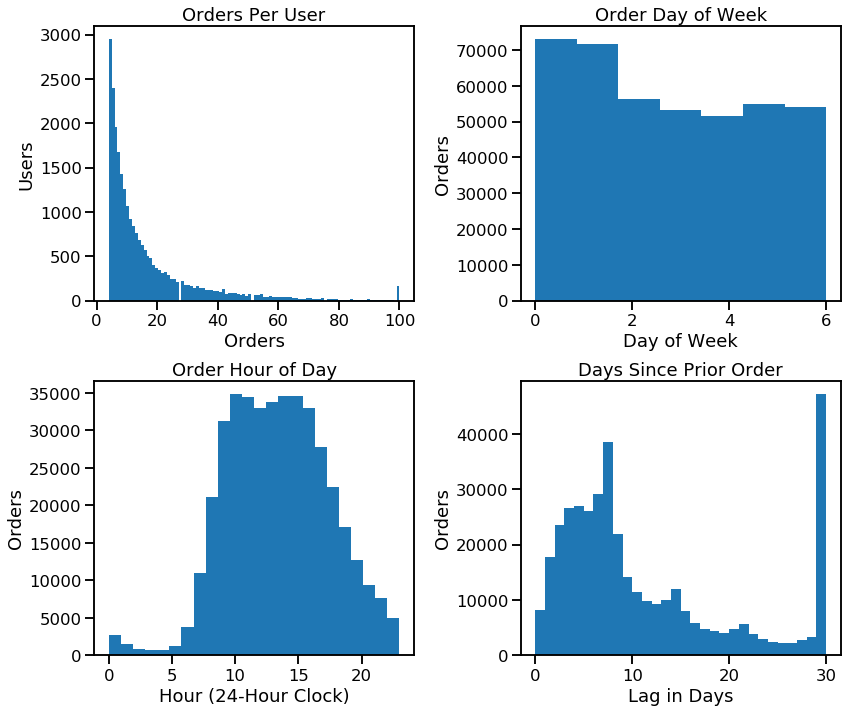

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

ax0 = axes[0,0]
ax0.hist(orders.user_id.value_counts(), bins=100)
ax0.set_title('Orders Per User')
ax0.set_xlabel('Orders')
ax0.set_ylabel('Users')

ax1 = axes[0,1]
ax1.hist(orders.order_dow, bins=7)
ax1.set_title('Order Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Orders')

ax2 = axes[1,0]
ax2.hist(orders.order_hour_of_day, bins=24)
ax2.set_title('Order Hour of Day')
ax2.set_xlabel('Hour (24-Hour Clock)')
ax2.set_ylabel('Orders')

ax3 = axes[1,1]
ax3.hist(orders.days_since_prior_order, bins=30)
ax3.set_title('Days Since Prior Order')
ax3.set_xlabel('Lag in Days')
ax3.set_ylabel('Orders')

plt.tight_layout()
plt.show();


### Order_products table

In [59]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM order_products
    LIMIT 10000
            ;""")
order_products = pd.DataFrame(cur.fetchall())
order_products.columns = [x[0] for x in cur.description]
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


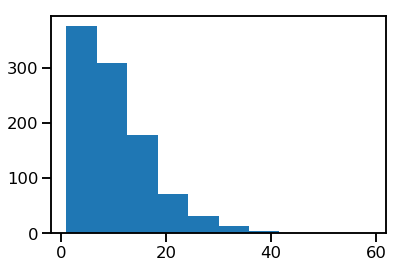

In [34]:
plt.hist(order_products.order_id.value_counts());

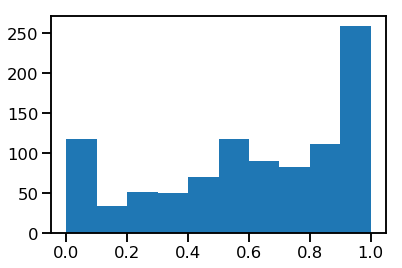

In [37]:
plt.hist(order_products.groupby('order_id')['reordered'].mean());

### Products table

In [28]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM products
            ;""")
products = pd.DataFrame(cur.fetchall())
products.columns = [x[0] for x in cur.description]
products.head()

,index,product_id,product_name,aisle_id,department_id
0,0,1,Chocolate Sandwich Cookies,61,19
1,1,2,All-Seasons Salt,104,13
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,4,5,Green Chile Anytime Sauce,5,13


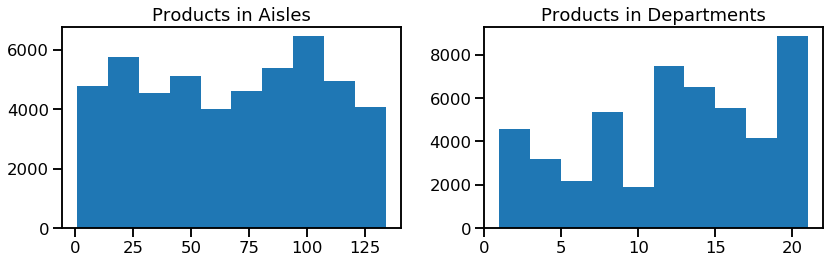

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax0 = axes[0]
ax0.hist(products.aisle_id)
ax0.set_title('Products in Aisles')

ax1 = axes[1]
ax1.hist(products.department_id)
ax1.set_title('Products in Departments')

plt.tight_layout()
plt.show();

In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 5 columns):
index            49688 non-null int64
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


Aside from the questions below about number of products per aisle or dept, what else can we ask here? 

### Aisles table

In [30]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM aisles
            ;""")
aisles = pd.DataFrame(cur.fetchall())
aisles.columns = [x[0] for x in cur.description]
aisles.head()

,index,aisle_id,aisle
0,0,1,prepared soups salads
1,1,2,specialty cheeses
2,2,3,energy granola bars
3,3,4,instant foods
4,4,5,marinades meat preparation


In [43]:
aisles[aisles['aisle_id'] == 100]

,index,aisle_id,aisle
99,99,100,missing


In [40]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
index       134 non-null int64
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [44]:
[name for name in aisles.aisle]

['prepared soups salads',
 'specialty cheeses',
 'energy granola bars',
 'instant foods',
 'marinades meat preparation',
 'other',
 'packaged meat',
 'bakery desserts',
 'pasta sauce',
 'kitchen supplies',
 'cold flu allergy',
 'fresh pasta',
 'prepared meals',
 'tofu meat alternatives',
 'packaged seafood',
 'fresh herbs',
 'baking ingredients',
 'bulk dried fruits vegetables',
 'oils vinegars',
 'oral hygiene',
 'packaged cheese',
 'hair care',
 'popcorn jerky',
 'fresh fruits',
 'soap',
 'coffee',
 'beers coolers',
 'red wines',
 'honeys syrups nectars',
 'latino foods',
 'refrigerated',
 'packaged produce',
 'kosher foods',
 'frozen meat seafood',
 'poultry counter',
 'butter',
 'ice cream ice',
 'frozen meals',
 'seafood counter',
 'dog food care',
 'cat food care',
 'frozen vegan vegetarian',
 'buns rolls',
 'eye ear care',
 'candy chocolate',
 'mint gum',
 'vitamins supplements',
 'breakfast bars pastries',
 'packaged poultry',
 'fruit vegetable snacks',
 'preserved dips spreads

- What aisles contain the most products? Least?
- What aisles do people order from the most?

### Departments table

In [33]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM departments
            ;""")
departments = pd.DataFrame(cur.fetchall())
departments.columns = [x[0] for x in cur.description]
departments.head()

,index,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol


In [38]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
index            21 non-null int64
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [39]:
[name for name in departments.department]

['frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing']

- What are the various departments?
- Which departments contain the most items?
- Which departments do people order from the most?

# Cleaning

# Analyses

- Do people buying stuff for babies buy more items overall? (Hypothesis test: number of products in orders containing baby items v. orders not containing baby items.)
- What about people buying alcohol? Is alcohol part of a larger order, eg for a party, or are people using this as an alcohol delivery service?
- What can we learn about the most active users (e.g., top 1% by number or size of orders?)
- What are the busiest days of week?
- What are the busiest times of day?
- What are the most popular items?
- Does order size vary by day or time? E.g., are people placing smaller orders on weeknights and bigger orders on weekends? (This is a hypothesis test: weeknight order product count v. weekend order product count.)
- Can customers be clustered in any interesting ways? E.g., weekend v. weekday, alcohol consumers, baby product consumers, meat consumers, organic consumers? Features to create: number of orders; average size of order; average time of day; average DOW; average time between orders; has ordered alcohol; has ordered baby stuff; average reorder rate > 50%; 

## Quick and easy

### Count of unique users

How many unique users are represented in this dataset?

In [10]:
# Count unique users by user_id in orders table
orders.user_id.nunique()

25000

### Busiest day of week

What is the busiest day of the week by number of orders?

In [27]:
orders.order_dow.value_counts()

0    72971
1    71582
2    56404
5    54903
6    54156
3    53205
4    51551
Name: order_dow, dtype: int64

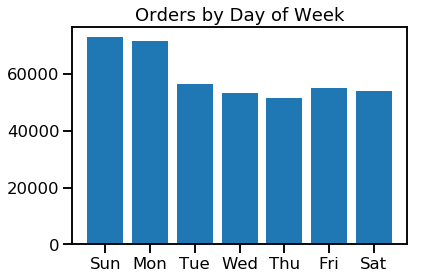

In [33]:
days = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
values = [orders.order_dow.value_counts()[day] for day in days.keys()]
plt.bar(days.values(), values)
plt.title('Orders by Day of Week')
plt.show();

In [22]:
orders.order_dow.value_counts().max()

72971

### Busiest time of day

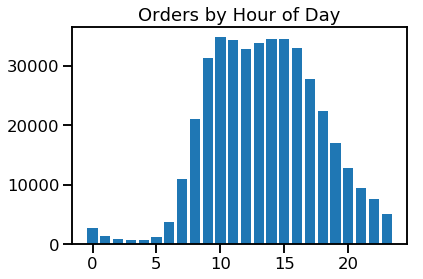

In [35]:
plt.bar(orders.order_hour_of_day.value_counts().index, orders.order_hour_of_day.value_counts())
plt.title('Orders by Hour of Day')
plt.show();

The busiest part of the day is 10 AM-3 PM.

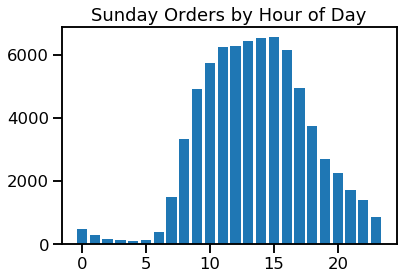

In [40]:
sundays = orders[orders.order_dow == 0]
plt.bar(sundays.order_hour_of_day.value_counts().index, sundays.order_hour_of_day.value_counts())
plt.title('Sunday Orders by Hour of Day')
plt.show();

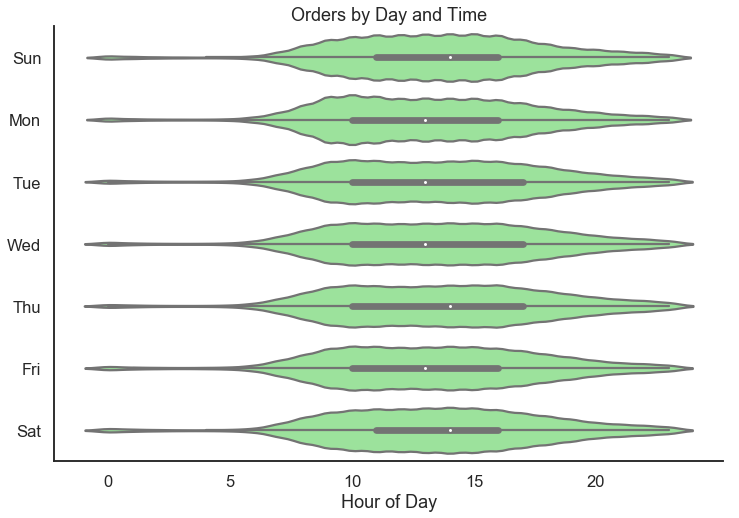

In [104]:
sns.set_context('talk')
plt.figure(figsize=(12, 8))
sns.violinplot(orders.order_hour_of_day, orders.order_dow, orient='h', color='lightgreen')
plt.yticks(range(7), [days[n] for n in range(7)])
plt.xticks([0, 5, 10, 15, 20], [0, 5, 10, 15, 20])
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.title('Orders by Day and Time')
sns.despine()
plt.show();

### Average size of order (also broken down by day/time)

In [110]:
# Query the database and load the data
cur.execute("""
    SELECT order_id, COUNT(*) AS num_products
    FROM order_products
    GROUP BY order_id
            ;""")
prod_counts = pd.DataFrame(cur.fetchall())
prod_counts.columns = [x[0] for x in cur.description]
prod_counts.head()

,order_id,num_products
0,2,9
1,4,13
2,15,5
3,19,3
4,27,27


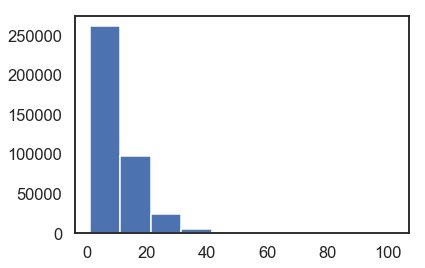

In [111]:
plt.hist(prod_counts.num_products);

In [112]:
prod_counts.describe()

,order_id,num_products
count,3.897720e+05,389772.000000
mean,1.709445e+06,10.066880
std,9.883441e+05,7.501151
min,2.000000e+00,1.000000
25%,8.529415e+05,5.000000
50%,1.710362e+06,8.000000
75%,2.564951e+06,14.000000
max,3.421073e+06,102.000000


In [133]:
# Query the database and load the data
cur.execute("""
    SELECT o.order_id, 
           o.order_dow,
           COUNT(op.product_id) AS num_products
    FROM orders AS o
    INNER JOIN order_products AS op
    ON o.order_id = op.order_id
    GROUP BY o.order_dow, o.order_id
            ;""")
dow_prod_count = pd.DataFrame(cur.fetchall())
dow_prod_count.columns = [x[0] for x in cur.description]
dow_prod_count.head()

,order_id,order_dow,num_products
0,62,0,7
1,114,0,10
2,130,0,14
3,193,0,12
4,214,0,9


In [132]:
dow_prod_count.groupby('order_dow')['num_products'].mean()

order_dow
0    11.142984
1    10.165645
2     9.538616
3     9.269974
4     9.424939
5     9.887200
6    10.637184
Name: num_products, dtype: float64

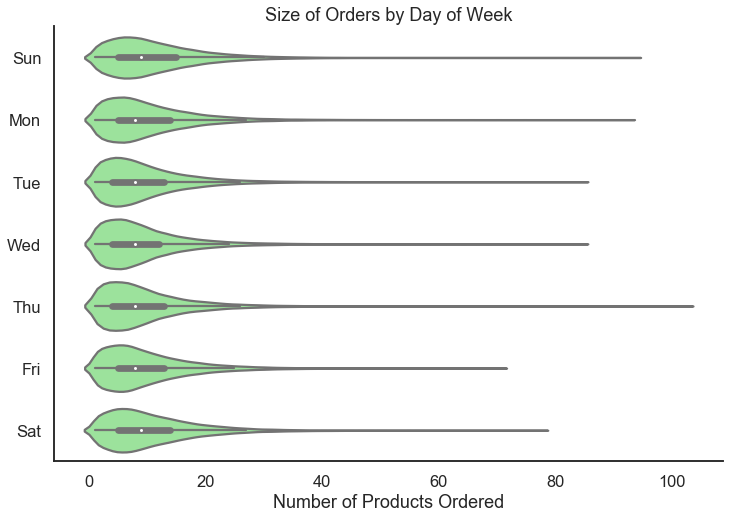

In [142]:
plt.figure(figsize=(12, 8))
sns.violinplot(dow_prod_count.num_products, dow_prod_count.order_dow, orient='h', color='lightgreen')
# plt.axvline(x=dow_prod_count.num_products.median(), linestyle='--', color='r', label='Overall median order size')
plt.yticks(range(7), [days[n] for n in range(7)])
plt.xlabel('Number of Products Ordered')
plt.ylabel('')
plt.title('Size of Orders by Day of Week')
# plt.legend()
sns.despine()
plt.show();

### Average % of reordered products per order and overall

In [144]:
# Query the database and load the data
cur.execute("""
    SELECT order_id, AVG(reordered) AS reorder_rate
    FROM order_products
    GROUP BY order_id
            ;""")
reorder_rate = pd.DataFrame(cur.fetchall())
reorder_rate.columns = [x[0] for x in cur.description]
reorder_rate.head()

,order_id,reorder_rate
0,2,0.666667
1,4,0.923077
2,15,1.000000
3,19,1.000000
4,27,0.592593


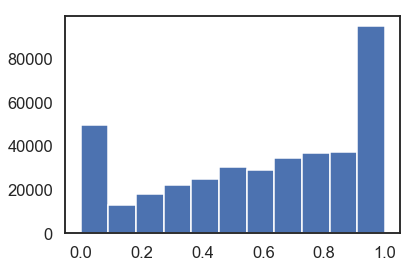

In [147]:
plt.hist(reorder_rate.reorder_rate, bins=11);

In [154]:
reorder_rate.reorder_rate.describe()

count    389772.000000
mean          0.598224
std           0.337890
min           0.000000
25%           0.333333
50%           0.666667
75%           0.904075
max           1.000000
Name: reorder_rate, dtype: float64

In [150]:
# Query the database and load the data
cur.execute("""
    SELECT order_id,
           COUNT(product_id) AS num_products,
           AVG(reordered) AS reorder_rate
    FROM order_products
    GROUP BY order_id
    HAVING AVG(reordered) = 1.0
            ;""")
only_reorder = pd.DataFrame(cur.fetchall())
only_reorder.columns = [x[0] for x in cur.description]
only_reorder.head()

,order_id,num_products,reorder_rate
0,15,5,1.0
1,19,3,1.0
2,111,5,1.0
3,139,6,1.0
4,205,3,1.0


In [153]:
only_reorder.num_products.describe()

count    83979.000000
mean         5.729004
std          5.011902
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         80.000000
Name: num_products, dtype: float64

In [155]:
# Query the database and load the data
cur.execute("""
    SELECT order_id,
           COUNT(product_id) AS num_products,
           AVG(reordered) AS reorder_rate
    FROM order_products
    GROUP BY order_id
    HAVING AVG(reordered) != 1.0
            ;""")
not_only_reorder = pd.DataFrame(cur.fetchall())
not_only_reorder.columns = [x[0] for x in cur.description]
not_only_reorder.head()

,order_id,num_products,reorder_rate
0,2,9,0.666667
1,4,13,0.923077
2,27,27,0.592593
3,52,5,0.600000
4,62,7,0.285714


In [156]:
not_only_reorder.num_products.describe()

count    305793.000000
mean         11.258178
std           7.631158
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max         102.000000
Name: num_products, dtype: float64

### Most popular items (also aggregated by aisle/dept)

In [157]:
# Query the database and load the data
cur.execute("""
    SELECT p.product_id,
           p.product_name,
           p.aisle_id,
           p.department_id,
           COUNT(op.product_id) AS count
    FROM products AS p
    LEFT JOIN order_products AS op
    ON p.product_id = op.product_id
    GROUP BY 1, 2, 3, 4
            ;""")
popular = pd.DataFrame(cur.fetchall())
popular.columns = [x[0] for x in cur.description]
popular.head()

,product_id,product_name,aisle_id,department_id,count
0,1,Chocolate Sandwich Cookies,61,19,231
1,2,All-Seasons Salt,104,13,11
2,3,Robust Golden Unsweetened Oolong Tea,94,7,44
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,35
4,5,Green Chile Anytime Sauce,5,13,9


In [160]:
popular['count'].describe()

count    49688.000000
mean        78.968524
std        582.505099
min          0.000000
25%          2.000000
50%          7.000000
75%         32.000000
max      58231.000000
Name: count, dtype: float64

In [205]:
top_pop = popular.sort_values(by='count', ascending=False)
top_pop[:10]

,product_id,product_name,aisle_id,department_id,count
24851,24852,Banana,24,4,58231
13175,13176,Bag of Organic Bananas,24,4,45699
21136,21137,Organic Strawberries,24,4,32203
21902,21903,Organic Baby Spinach,123,4,29380
47208,47209,Organic Hass Avocado,24,4,25958
47765,47766,Organic Avocado,24,4,21642
47625,47626,Large Lemon,24,4,18581
26208,26209,Limes,24,4,17399
16796,16797,Strawberries,24,4,17217
27844,27845,Organic Whole Milk,84,16,16468


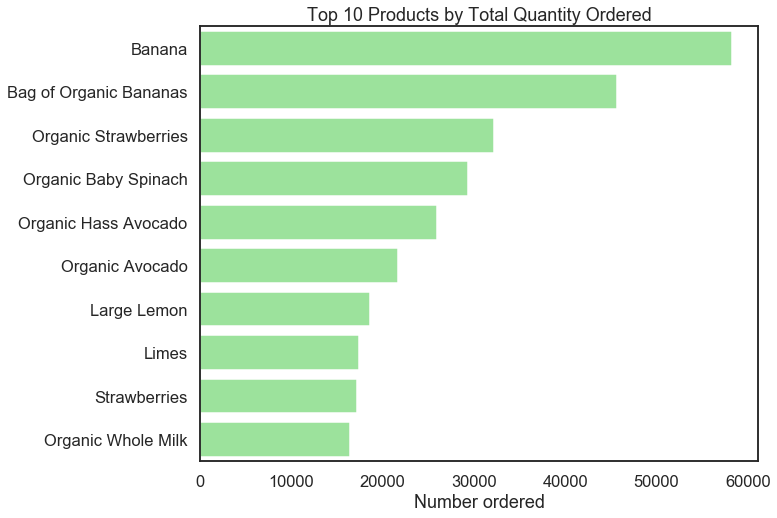

In [239]:
plt.figure(figsize=(10,8))
sns.barplot(x='count', y='product_name', data=top_pop[:10], color='lightgreen');
plt.xlabel('Number ordered')
plt.ylabel('')
plt.title('Top 10 Products by Total Quantity Ordered')
plt.show();

### Busiest aisle/dept

In [250]:
# Query the database and load the data
cur.execute("""
    SELECT p.product_id,
           p.product_name,
           p.aisle_id,
           a.aisle,
           p.department_id,
           d.department,
           COUNT(op.product_id) AS count
    FROM products AS p
    LEFT JOIN order_products AS op
    ON p.product_id = op.product_id
    LEFT JOIN departments AS d
    ON p.department_id = d.department_id
    LEFT JOIN aisles AS a
    ON p.aisle_id = a.aisle_id
    GROUP BY 1, 2, 3, 4, 5, 6
            ;""")
depts = pd.DataFrame(cur.fetchall())
depts.columns = [x[0] for x in cur.description]
depts.head()

,product_id,product_name,aisle_id,aisle,department_id,department,count
0,1,Chocolate Sandwich Cookies,61,cookies cakes,19,snacks,231
1,2,All-Seasons Salt,104,spices seasonings,13,pantry,11
2,3,Robust Golden Unsweetened Oolong Tea,94,tea,7,beverages,44
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,1,frozen,35
4,5,Green Chile Anytime Sauce,5,marinades meat preparation,13,pantry,9


In [259]:
by_dept = pd.DataFrame(depts.groupby(['department_id', 'department'])['count'].sum()).reset_index()
by_dept.sort_values('count', ascending=False, inplace=True)

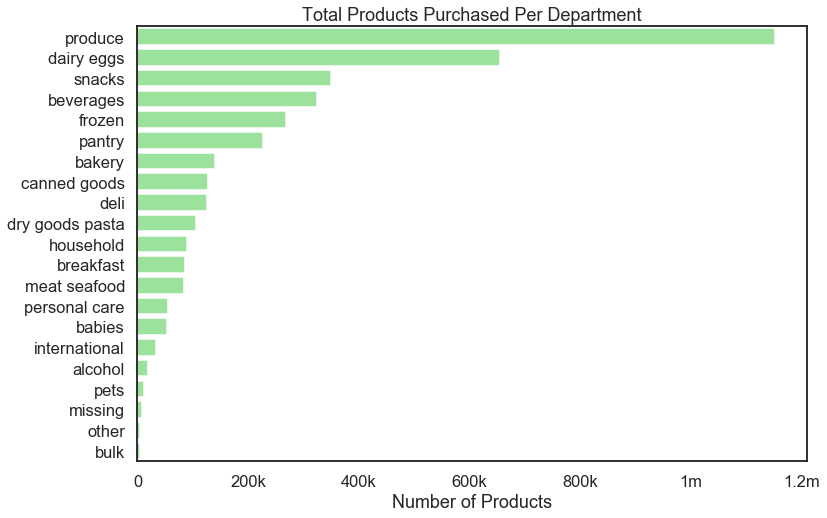

In [269]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='department', data=by_dept, orient='h', color='lightgreen')
plt.title('Total Products Purchased Per Department')
plt.xlabel('Number of Products')
plt.xticks([0, 2e5, 4e5, 6e5, 8e5, 1e6, 1.2e6], ['0', '200k', '400k', '600k', '800k', '1m', '1.2m'])
plt.ylabel('')
plt.show();

In [264]:
by_aisle = pd.DataFrame(depts.groupby(['aisle_id', 'aisle'])['count'].sum()).reset_index()
by_aisle.sort_values('count', ascending=False, inplace=True)

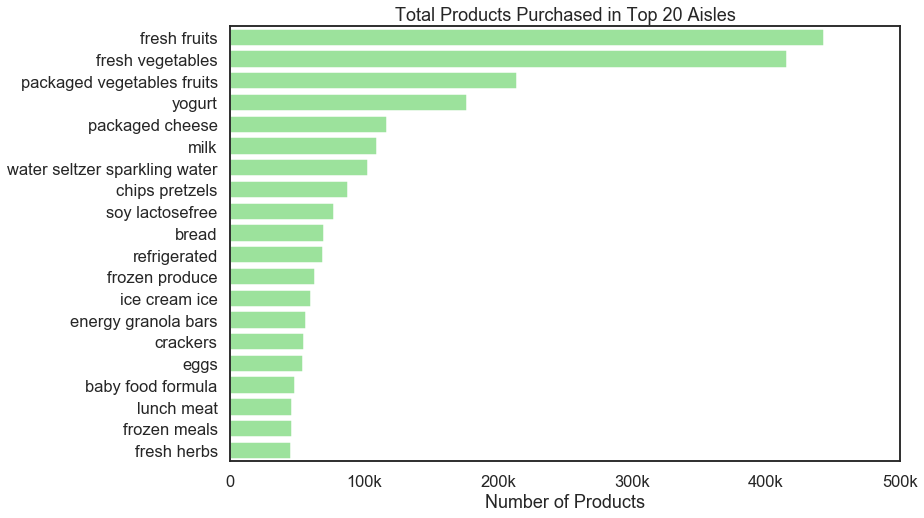

In [272]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='aisle', data=by_aisle[:20], orient='h', color='lightgreen')
plt.title('Total Products Purchased in Top 20 Aisles')
plt.xlabel('Number of Products')
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], ['0', '100k', '200k', '300k', '400k', '500k'])
plt.ylabel('')
plt.show();

## Hypothesis tests

Weekday order product count v. weekend order product count

In [4]:
# Query the database and load the data
cur.execute("""
    SELECT o.order_id,
           o.order_dow,
           COUNT(op.product_id) AS count
    FROM orders AS o
    INNER JOIN order_products AS op
    ON o.order_id = op.order_id
    GROUP BY 1, 2
            ;""")
dow = pd.DataFrame(cur.fetchall())
dow.columns = [x[0] for x in cur.description]
dow.head()

,order_id,order_dow,count
0,2,5,9
1,4,1,13
2,15,3,5
3,19,5,3
4,27,6,27


In [92]:
peak = dow[dow.order_dow <= 1]['count']
offpeak = dow[dow.order_dow > 1]['count']

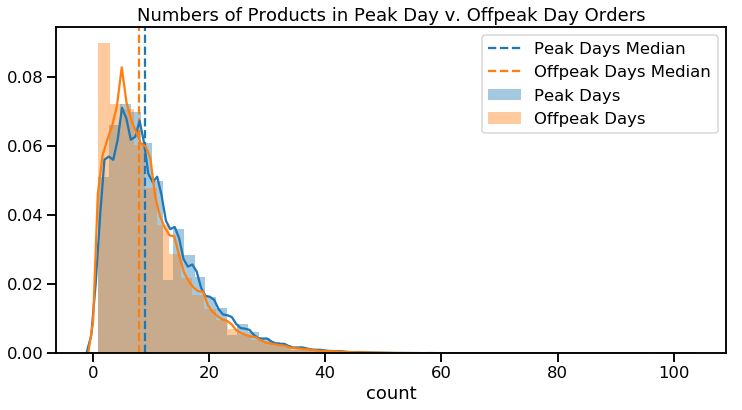

In [94]:
plt.figure(figsize=(12,6))
sns.distplot(peak, label='Peak Days')
sns.distplot(offpeak, label='Offpeak Days')
plt.axvline(x=peak.median(), label='Peak Days Median', color='tab:blue', linestyle='--')
plt.axvline(x=offpeak.median(), label='Offpeak Days Median', color='tab:orange', linestyle='--')
plt.legend()
plt.title('Numbers of Products in Peak Day v. Offpeak Day Orders')
plt.show();

Should I log-transform this or just remove outliers above 1.5 * IQR?

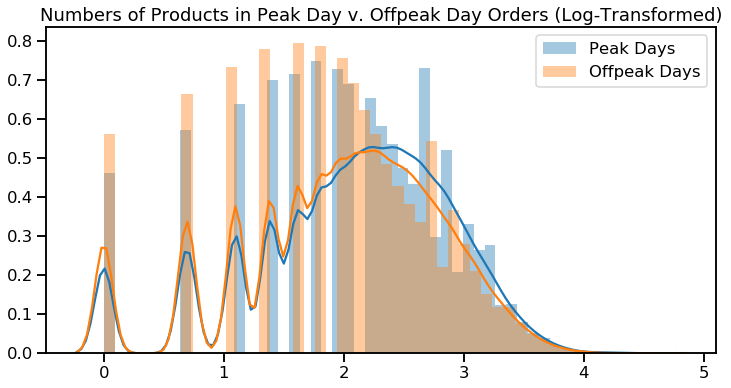

In [95]:
peak_log = [np.log(x) for x in peak]
offpeak_log = [np.log(x) for x in offpeak]

plt.figure(figsize=(12,6))
sns.distplot(peak_log, label='Peak Days')
sns.distplot(offpeak_log, label='Offpeak Days')
plt.legend()
plt.title('Numbers of Products in Peak Day v. Offpeak Day Orders (Log-Transformed)')
plt.show();

In [98]:
# Calculate the cutoff point (1.5*IQR + 75th percentile)
iqr_peak = stats.iqr(peak)
upper_quartile = np.percentile(peak, 75)
cutoff_peak = 1.5 * iqr_peak + upper_quartile
cutoff_peak

27.5

In [96]:
# Calculate the cutoff point (1.5*IQR + 75th percentile)
iqr_offpeak = stats.iqr(offpeak)
upper_quartile = np.percentile(offpeak, 75)
cutoff_offpeak = 1.5 * iqr_offpeak + upper_quartile
cutoff_offpeak

26.5

In [99]:
peak_trim = peak[peak < cutoff_peak]
offpeak_trim = offpeak[offpeak < cutoff_offpeak]

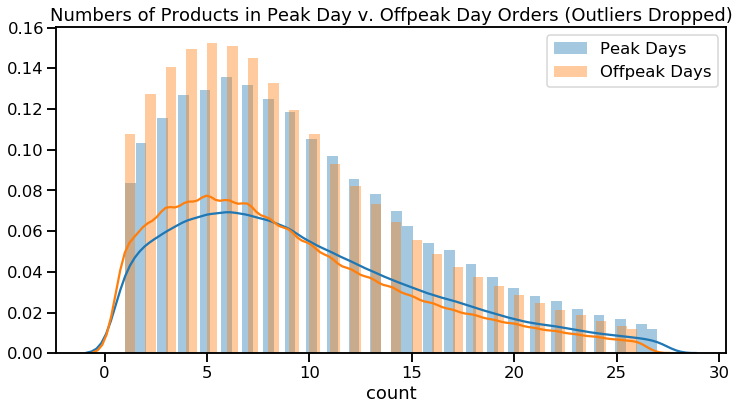

In [100]:
plt.figure(figsize=(12,6))
sns.distplot(peak_trim, label='Peak Days')
sns.distplot(offpeak_trim, label='Offpeak Days')
plt.legend()
plt.title('Numbers of Products in Peak Day v. Offpeak Day Orders (Outliers Dropped)')
plt.show();

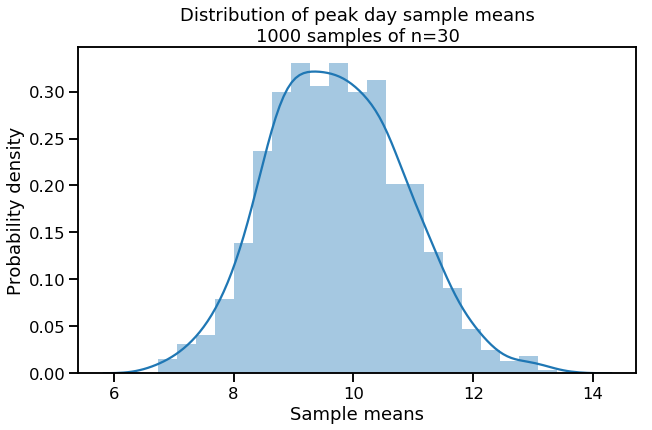

In [102]:
# Plot the means of 1000 samples of size 30
sample_means = []
for n in range(1000):
    sample = np.random.choice(peak_trim, 30)
    mean = np.mean(sample)
    sample_means.append(mean)

plt.figure(figsize=(10,6))
sns.distplot(sample_means)
plt.xlabel('Sample means')
plt.ylabel('Probability density')
plt.title('Distribution of peak day sample means\n1000 samples of n=30')
plt.show();


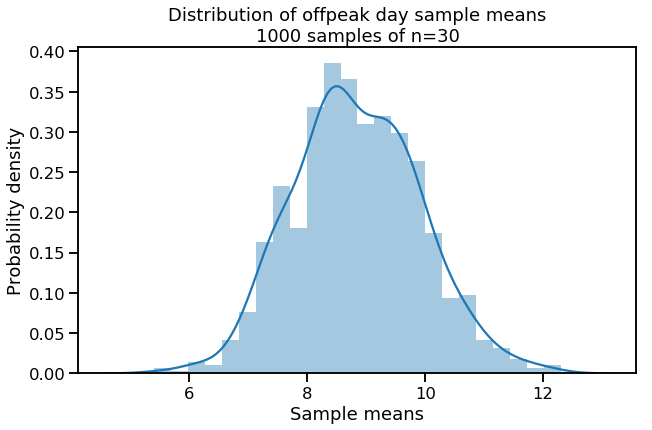

In [103]:
# Plot the means of 1000 samples of size 30
sample_means = []
for n in range(1000):
    sample = np.random.choice(offpeak_trim, 30)
    mean = np.mean(sample)
    sample_means.append(mean)

plt.figure(figsize=(10,6))
sns.distplot(sample_means)
plt.xlabel('Sample means')
plt.ylabel('Probability density')
plt.title('Distribution of offpeak day sample means\n1000 samples of n=30')
plt.show();

In [104]:
# Compare sample variances (null hypothesis: they are equal)
stats.levene(peak_trim, offpeak_trim)

LeveneResult(statistic=609.8170850360855, pvalue=1.57105692744e-134)

In [105]:
run_welch(peak_trim, offpeak_trim)

Null hypothesis rejected (p_value = 0.0)


In [106]:
size_and_power(peak_trim, offpeak_trim)

Raw effect size: 0.853352170006545
Cohen's d: 0.14278340937991263
Power: 1.0


## Clustering

### Calculate RFM values

In [43]:
# Calculate recency for each user
user_2 = orders[orders.user_id == 2]
user_2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0
5,1199898,2,6,2,9,13.0
6,3194192,2,7,2,12,14.0
7,788338,2,8,1,15,27.0
8,1718559,2,9,2,9,8.0
9,1447487,2,10,1,11,6.0


In [51]:
user_2.days_since_prior_order.mean().round(0)

16.0

/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


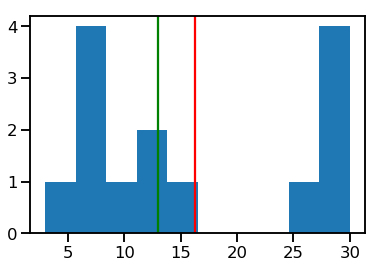

In [54]:
plt.hist(user_2.days_since_prior_order)
plt.axvline(user_2.days_since_prior_order.mean(), color='r')
plt.axvline(user_2.days_since_prior_order.median(), color='g')
plt.show();

Feature engineering options:
- max(order_number): how many orders the user has placed since record-keeping began (sort of a proxy for frequency); keep in mind that this value is capped at 100
- order_dow: median per user; needs to be recoded either so that Monday = 1 or as binary (weekend 1 v. weekday 0)
- order_hour_of_day: median per user; needs to be recoded 08:00-15:59 (peak)/16:00-23:59 (late)/00:00-07:59 (early)
- days_since_prior_order: use mean per user b/c values capped at 30, and if a user has a lot of 30s, the mean will more accurately capture the longer time they tend to spend between orders
- average # products/order

In [61]:
# Query the database and load the data
cur.execute("""
    SELECT order_id,
           COUNT(product_id) AS num_products
    FROM order_products
    GROUP BY 1
            ;""")
prod_counts = pd.DataFrame(cur.fetchall())
prod_counts.columns = [x[0] for x in cur.description]
prod_counts.head()

,order_id,num_products
0,2,9
1,4,13
2,15,5
3,19,3
4,27,27


In [63]:
prod_counts.set_index('order_id', inplace=True)
prod_counts.head()

,num_products
order_id,
2,9
4,13
15,5
19,3
27,27


In [68]:
prod_counts[prod_counts.index == 2168274]

,num_products
order_id,
2168274,13


In [64]:
user_data = orders.join(prod_counts, how='inner', on='order_id')
user_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products
0,2168274,2,1,2,11,NaN,13
1,1501582,2,2,5,10,10.0,6
2,1901567,2,3,1,10,3.0,5
3,738281,2,4,2,10,8.0,13
4,1673511,2,5,3,11,8.0,13


In [130]:
len(user_data)

389772

In [72]:
num_orders = user_data.groupby('user_id')['order_number'].max()

In [112]:
# user_data['order_dow_edit'] = np.where(user_data['order_dow'] == 0, 7, user_data['order_dow'])
# med_day = round(user_data.groupby('user_id')['order_dow'].median(), 0)
# med_day.head()

user_id
2     2.0
8     5.0
11    5.0
12    3.0
28    2.0
Name: order_dow, dtype: float64

In [114]:
user_data['order_on_peak'] = np.where(user_data['order_dow'] <=1, 1, 0)
user_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products,order_dow_edit,order_on_wknd,order_on_peak
0,2168274,2,1,2,11,NaN,13,2,0,0
1,1501582,2,2,5,10,10.0,6,5,0,0
2,1901567,2,3,1,10,3.0,5,1,0,1
3,738281,2,4,2,10,8.0,13,2,0,0
4,1673511,2,5,3,11,8.0,13,3,0,0


In [158]:
peakday_rate = round(user_data.groupby('user_id')['order_on_wknd'].mean(), 2)
peakday_rate.head()

user_id
2     0.00
8     0.33
11    0.00
12    0.00
28    0.00
Name: order_on_wknd, dtype: float64

In [154]:
peakday_rate.value_counts()

0.00    9581
0.33    1187
0.25    1139
0.20     954
0.17     922
        ... 
0.95       1
0.72       1
0.82       1
0.92       1
0.84       1
Name: order_on_wknd, Length: 88, dtype: int64

In [90]:
med_hour = round(user_data.groupby('user_id')['order_hour_of_day'].median(), 0)
med_hour.head()

user_id
2     10.0
8      0.0
11    11.0
12     9.0
28    15.0
Name: order_hour_of_day, dtype: float64

In [124]:
user_data['peak_time'] = np.where((user_data.order_hour_of_day >= 10) & (user_data.order_hour_of_day <= 16), 1, 0)
user_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products,order_dow_edit,order_on_wknd,order_on_peak,peak_time
0,2168274,2,1,2,11,NaN,13,2,0,0,1
1,1501582,2,2,5,10,10.0,6,5,0,0,1
2,1901567,2,3,1,10,3.0,5,1,0,1,1
3,738281,2,4,2,10,8.0,13,2,0,0,1
4,1673511,2,5,3,11,8.0,13,3,0,0,1


In [126]:
peaktime_rate = round(user_data.groupby('user_id')['peak_time'].mean(), 2)
peaktime_rate.value_counts()

0.67    1983
1.00    1926
0.50    1806
0.33    1383
0.75    1125
        ... 
0.16       9
0.05       7
0.98       3
0.02       2
0.04       2
Name: peak_time, Length: 98, dtype: int64

In [127]:
mean_lag = round(user_data.groupby('user_id')['days_since_prior_order'].mean(), 0)
mean_lag.head()

user_id
2     15.0
8     30.0
11    20.0
12    25.0
28    12.0
Name: days_since_prior_order, dtype: float64

In [129]:
mean_products = round(user_data.groupby('user_id')['num_products'].mean(), 0)
mean_products.head()

user_id
2     14.0
8     16.0
11    13.0
12    15.0
28     8.0
Name: num_products, dtype: float64

In [159]:
features = pd.concat([num_orders, peakday_rate, med_hour, peaktime_rate, 
                      mean_lag, mean_products], axis=1)
features.columns = ['num_orders', 'peakday_rate', 'med_hour', 'peaktime_rate', 
                    'mean_lag', 'mean_products']
features.head()

,num_orders,peakday_rate,med_hour,peaktime_rate,mean_lag,mean_products
user_id,,,,,,
2,14,0.00,10.0,0.79,15.0,14.0
8,3,0.33,0.0,0.00,30.0,16.0
11,7,0.00,11.0,0.86,20.0,13.0
12,5,0.00,9.0,0.20,25.0,15.0
28,24,0.00,15.0,0.67,12.0,8.0


In [160]:
features.isna().sum()

num_orders       0
peakday_rate     0
med_hour         0
peaktime_rate    0
mean_lag         0
mean_products    0
dtype: int64

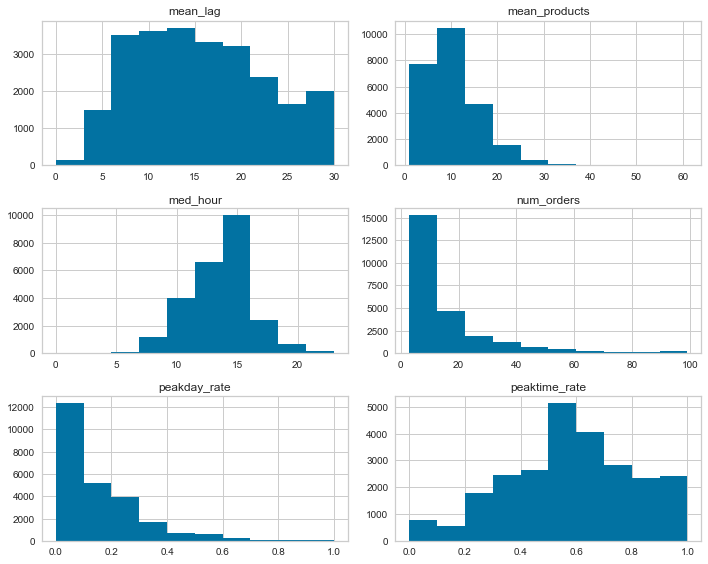

In [161]:
features.hist(figsize=(10,8))
plt.tight_layout();

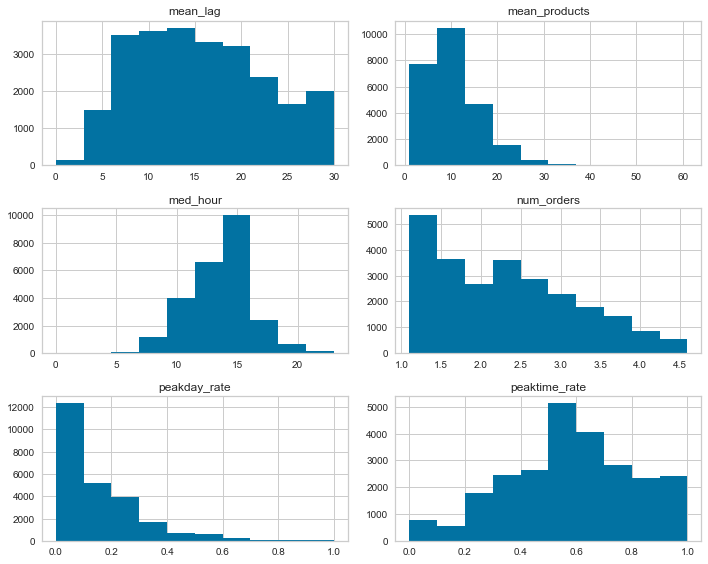

In [162]:
features['num_orders'] = np.log(features['num_orders'])
features.hist(figsize=(10,8))
plt.tight_layout();

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feat_scaled = scaler.fit_transform(features)

In [170]:
feat_scaled = pd.DataFrame(feat_scaled)
feat_scaled.describe()

,0,1,2,3,4,5
count,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04
mean,-3.666401e-17,-4.462208e-17,-6.309619e-17,3.780087e-17,4.689582e-18,1.419664e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.392834e+00,-8.524085e-01,-5.105653e+00,-2.422381e+00,-2.138832e+00,-1.528491e+00
25%,-8.140750e-01,-8.524085e-01,-5.981727e-01,-7.038690e-01,-8.758053e-01,-6.747647e-01
50%,-1.481203e-01,-2.221396e-01,1.530740e-01,9.251463e-02,-3.378737e-02,-1.625290e-01
75%,6.984640e-01,4.711563e-01,5.286974e-01,7.212386e-01,6.678942e-01,5.204520e-01
max,2.568664e+00,5.450281e+00,3.533685e+00,1.769112e+00,2.071257e+00,8.716224e+00


### Test various numbers of clusters (elbow plot)

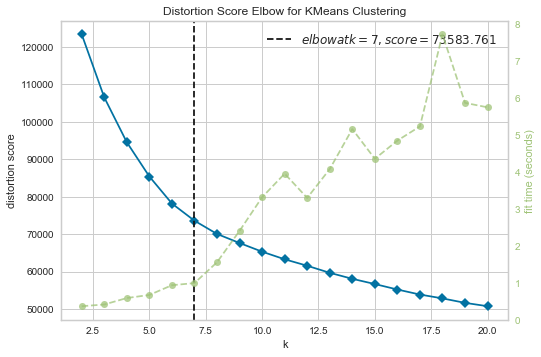

In [168]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(feat_scaled)   
visualizer.show();

In [173]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    from sklearn.metrics import silhouette_score
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(6.47,3))

            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=1000)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score: 0.172, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.182, Change from Previous Cluster: 0.01
No. Clusters: 4, Silhouette Score: 0.191, Change from Previous Cluster: 0.009
No. Clusters: 5, Silhouette Score: 0.194, Change from Previous Cluster: 0.003
No. Clusters: 6, Silhouette Score: 0.198, Change from Previous Cluster: 0.004
No. Clusters: 7, Silhouette Score: 0.17, Change from Previous Cluster: -0.028
No. Clusters: 8, Silhouette Score: 0.156, Change from Previous Cluster: -0.014
No. Clusters: 9, Silhouette Score: 0.153, Change from Previous Cluster: -0.003


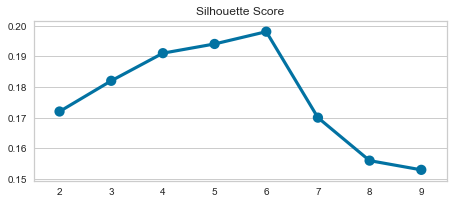

In [174]:
optimal_kmeans(feat_scaled, 2, 10)

### Visualize clusters with t-SNE

In [177]:
def kmeans(df, clusters_number):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        end : int. Ending range of kmeans to test.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    from sklearn.manifold import TSNE
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = df.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new, cluster_labels

(              0         1         2         3         4         5  Cluster
 0      0.352471 -0.852409 -1.349420  0.888898 -0.033787  0.691197        3
 1     -1.392834  1.227479 -5.105653 -2.422381  2.071257  1.032688        6
 2     -0.432856 -0.852409 -0.973796  1.182303  0.667894  0.520452        4
 3     -0.814075 -0.852409 -1.725043 -1.584083  1.369576  0.861942        6
 4      0.963147 -0.852409  0.528697  0.385919 -0.454796 -0.333274        2
 ...         ...       ...       ...       ...       ...       ...      ...
 24995  0.079237 -0.285166  1.655568 -2.045147 -0.454796  0.349707        0
 24996  0.698464  0.471156  0.904321 -0.200890  0.106549  1.203433        1
 24997  1.289087  0.534183  0.528697 -0.200890 -0.595133  0.520452        2
 24998  0.864564 -0.852409  0.528697 -1.458338 -0.314460 -0.162529        0
 24999  2.126315 -0.096086  1.279944 -0.787699 -1.577487 -1.016255        2
 
 [25000 rows x 7 columns], array([3, 6, 4, ..., 2, 0, 2], dtype=int32))

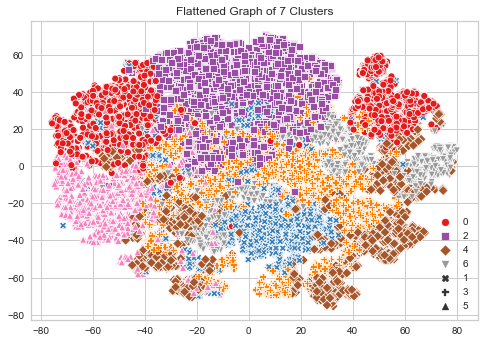

In [178]:
kmeans(feat_scaled, 7)

(              0         1         2         3         4         5  Cluster
 0      0.352471 -0.852409 -1.349420  0.888898 -0.033787  0.691197        5
 1     -1.392834  1.227479 -5.105653 -2.422381  2.071257  1.032688        4
 2     -0.432856 -0.852409 -0.973796  1.182303  0.667894  0.520452        0
 3     -0.814075 -0.852409 -1.725043 -1.584083  1.369576  0.861942        4
 4      0.963147 -0.852409  0.528697  0.385919 -0.454796 -0.333274        1
 ...         ...       ...       ...       ...       ...       ...      ...
 24995  0.079237 -0.285166  1.655568 -2.045147 -0.454796  0.349707        3
 24996  0.698464  0.471156  0.904321 -0.200890  0.106549  1.203433        6
 24997  1.289087  0.534183  0.528697 -0.200890 -0.595133  0.520452        6
 24998  0.864564 -0.852409  0.528697 -1.458338 -0.314460 -0.162529        6
 24999  2.126315 -0.096086  1.279944 -0.787699 -1.577487 -1.016255        6
 
 [25000 rows x 7 columns], array([5, 4, 0, ..., 6, 6, 6], dtype=int32))

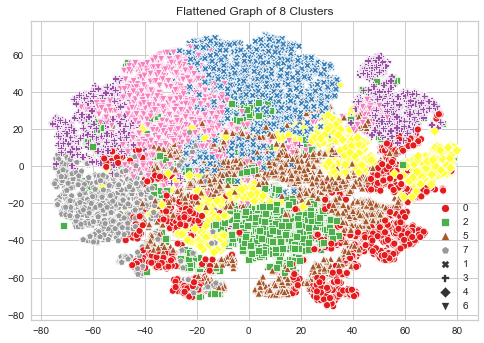

In [179]:
kmeans(feat_scaled, 8)

(              0         1         2         3         4         5  Cluster
 0      0.352471 -0.852409 -1.349420  0.888898 -0.033787  0.691197        0
 1     -1.392834  1.227479 -5.105653 -2.422381  2.071257  1.032688        5
 2     -0.432856 -0.852409 -0.973796  1.182303  0.667894  0.520452        0
 3     -0.814075 -0.852409 -1.725043 -1.584083  1.369576  0.861942        5
 4      0.963147 -0.852409  0.528697  0.385919 -0.454796 -0.333274        1
 ...         ...       ...       ...       ...       ...       ...      ...
 24995  0.079237 -0.285166  1.655568 -2.045147 -0.454796  0.349707        3
 24996  0.698464  0.471156  0.904321 -0.200890  0.106549  1.203433        2
 24997  1.289087  0.534183  0.528697 -0.200890 -0.595133  0.520452        1
 24998  0.864564 -0.852409  0.528697 -1.458338 -0.314460 -0.162529        3
 24999  2.126315 -0.096086  1.279944 -0.787699 -1.577487 -1.016255        1
 
 [25000 rows x 7 columns], array([0, 5, 0, ..., 1, 3, 1], dtype=int32))

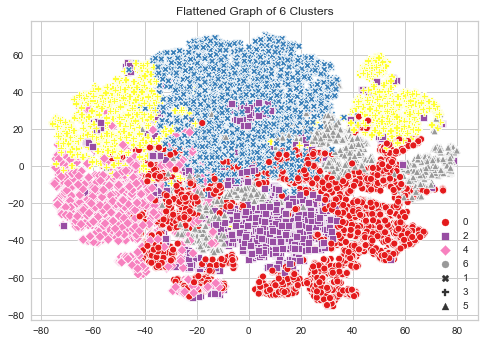

In [180]:
kmeans(feat_scaled, 6)

### Try again with fewer features

In [ ]:
features_fewer = features.drop(['med_hour', 'peakday_rate', 'peaktime_rate'], axis=1)
scaler = StandardScaler()
feat_few_scaled = scaler.fit_transform(features_fewer)

In [186]:
feat_few_scaled = pd.DataFrame(feat_few_scaled)

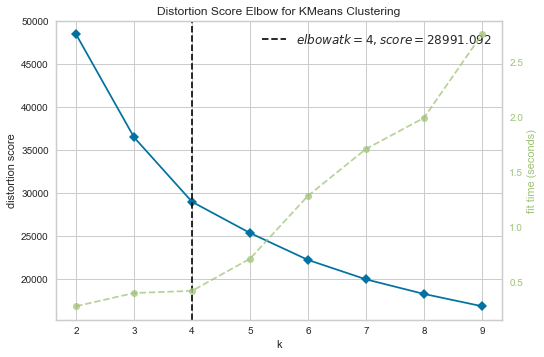

In [182]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(feat_few_scaled)   
visualizer.show();

No. Clusters: 2, Silhouette Score: 0.321, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.325, Change from Previous Cluster: 0.004
No. Clusters: 4, Silhouette Score: 0.29, Change from Previous Cluster: -0.035
No. Clusters: 5, Silhouette Score: 0.284, Change from Previous Cluster: -0.006
No. Clusters: 6, Silhouette Score: 0.283, Change from Previous Cluster: -0.001
No. Clusters: 7, Silhouette Score: 0.279, Change from Previous Cluster: -0.004
No. Clusters: 8, Silhouette Score: 0.264, Change from Previous Cluster: -0.015
No. Clusters: 9, Silhouette Score: 0.26, Change from Previous Cluster: -0.004


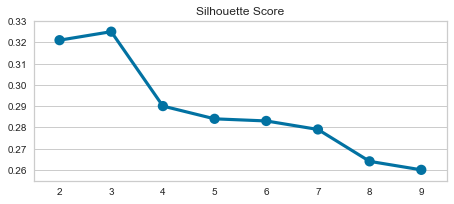

In [183]:
optimal_kmeans(feat_few_scaled, 2, 10)

(              0         1         2  Cluster
 0      0.352471 -0.033787  0.691197        2
 1     -1.392834  2.071257  1.032688        3
 2     -0.432856  0.667894  0.520452        3
 3     -0.814075  1.369576  0.861942        3
 4      0.963147 -0.454796 -0.333274        0
 ...         ...       ...       ...      ...
 24995  0.079237 -0.454796  0.349707        1
 24996  0.698464  0.106549  1.203433        2
 24997  1.289087 -0.595133  0.520452        0
 24998  0.864564 -0.314460 -0.162529        0
 24999  2.126315 -1.577487 -1.016255        0
 
 [25000 rows x 4 columns], array([2, 3, 3, ..., 0, 0, 0], dtype=int32))

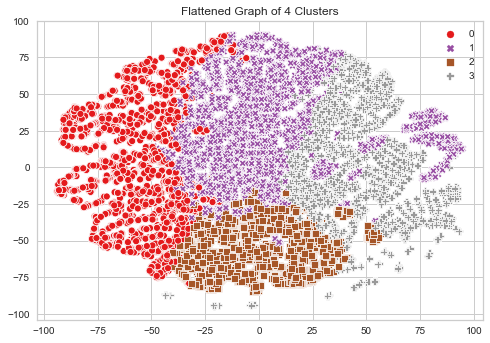

In [187]:
kmeans(feat_few_scaled, 4)

(              0         1         2  Cluster
 0      0.352471 -0.033787  0.691197        1
 1     -1.392834  2.071257  1.032688        2
 2     -0.432856  0.667894  0.520452        2
 3     -0.814075  1.369576  0.861942        1
 4      0.963147 -0.454796 -0.333274        0
 ...         ...       ...       ...      ...
 24995  0.079237 -0.454796  0.349707        0
 24996  0.698464  0.106549  1.203433        1
 24997  1.289087 -0.595133  0.520452        0
 24998  0.864564 -0.314460 -0.162529        0
 24999  2.126315 -1.577487 -1.016255        0
 
 [25000 rows x 4 columns], array([1, 2, 2, ..., 0, 0, 0], dtype=int32))

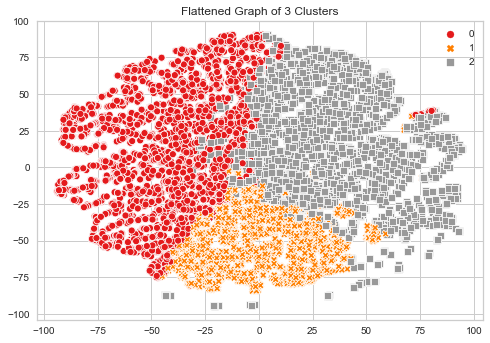

In [188]:
kmeans(feat_few_scaled, 3)

(              0         1         2  Cluster
 0      0.352471 -0.033787  0.691197        4
 1     -1.392834  2.071257  1.032688        3
 2     -0.432856  0.667894  0.520452        3
 3     -0.814075  1.369576  0.861942        3
 4      0.963147 -0.454796 -0.333274        4
 ...         ...       ...       ...      ...
 24995  0.079237 -0.454796  0.349707        4
 24996  0.698464  0.106549  1.203433        1
 24997  1.289087 -0.595133  0.520452        2
 24998  0.864564 -0.314460 -0.162529        4
 24999  2.126315 -1.577487 -1.016255        2
 
 [25000 rows x 4 columns], array([4, 3, 3, ..., 2, 4, 2], dtype=int32))

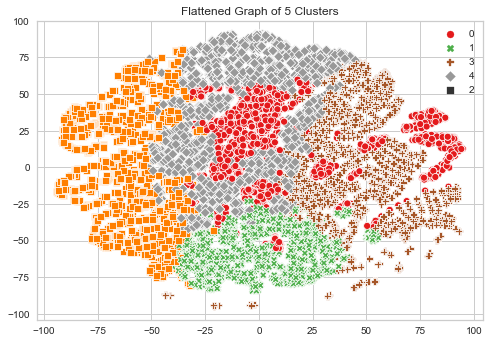

In [189]:
kmeans(feat_few_scaled, 5)

### Try again with day/time features

In [191]:
features_dt = features.loc[:, ['med_hour', 'peakday_rate', 'peaktime_rate']]
scaler = StandardScaler()
feat_dt_scaled = scaler.fit_transform(features_dt)
feat_dt_scaled = pd.DataFrame(feat_dt_scaled)

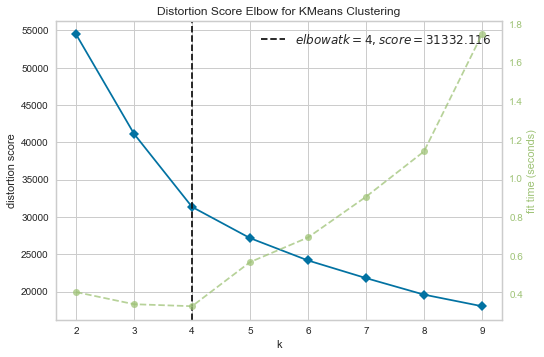

In [192]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(feat_dt_scaled)   
visualizer.show();

No. Clusters: 2, Silhouette Score: 0.296, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.314, Change from Previous Cluster: 0.018
No. Clusters: 4, Silhouette Score: 0.322, Change from Previous Cluster: 0.008
No. Clusters: 5, Silhouette Score: 0.277, Change from Previous Cluster: -0.045
No. Clusters: 6, Silhouette Score: 0.279, Change from Previous Cluster: 0.002
No. Clusters: 7, Silhouette Score: 0.287, Change from Previous Cluster: 0.008
No. Clusters: 8, Silhouette Score: 0.277, Change from Previous Cluster: -0.01
No. Clusters: 9, Silhouette Score: 0.284, Change from Previous Cluster: 0.007


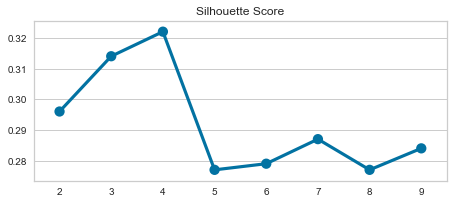

In [193]:
optimal_kmeans(feat_dt_scaled, 2, 10)

(              0         1         2  Cluster
 0     -1.349420 -0.852409  0.888898        0
 1     -5.105653  1.227479 -2.422381        1
 2     -0.973796 -0.852409  1.182303        0
 3     -1.725043 -0.852409 -1.584083        1
 4      0.528697 -0.852409  0.385919        0
 ...         ...       ...       ...      ...
 24995  1.655568 -0.285166 -2.045147        3
 24996  0.904321  0.471156 -0.200890        3
 24997  0.528697  0.534183 -0.200890        3
 24998  0.528697 -0.852409 -1.458338        3
 24999  1.279944 -0.096086 -0.787699        3
 
 [25000 rows x 4 columns], array([0, 1, 0, ..., 3, 3, 3], dtype=int32))

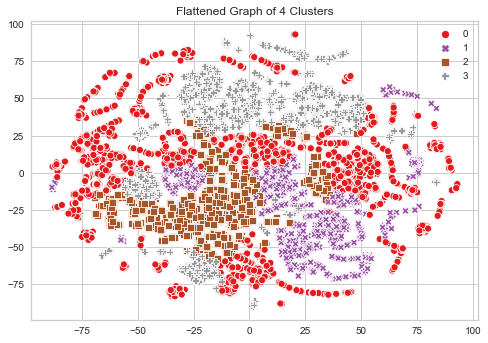

In [194]:
kmeans(feat_dt_scaled, 4)

(              0         1         2  Cluster
 0     -1.349420 -0.852409  0.888898        1
 1     -5.105653  1.227479 -2.422381        3
 2     -0.973796 -0.852409  1.182303        1
 3     -1.725043 -0.852409 -1.584083        3
 4      0.528697 -0.852409  0.385919        4
 ...         ...       ...       ...      ...
 24995  1.655568 -0.285166 -2.045147        2
 24996  0.904321  0.471156 -0.200890        4
 24997  0.528697  0.534183 -0.200890        4
 24998  0.528697 -0.852409 -1.458338        2
 24999  1.279944 -0.096086 -0.787699        2
 
 [25000 rows x 4 columns], array([1, 3, 1, ..., 4, 2, 2], dtype=int32))

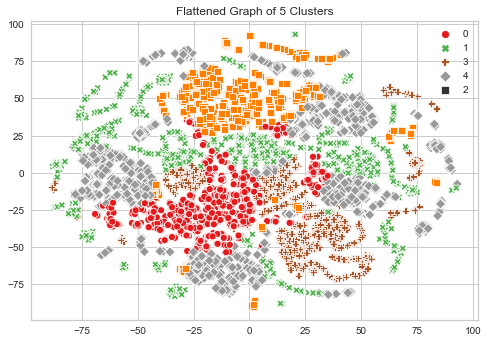

In [195]:
kmeans(feat_dt_scaled, 5)

(              0         1         2  Cluster
 0     -1.349420 -0.852409  0.888898        0
 1     -5.105653  1.227479 -2.422381        3
 2     -0.973796 -0.852409  1.182303        0
 3     -1.725043 -0.852409 -1.584083        3
 4      0.528697 -0.852409  0.385919        4
 ...         ...       ...       ...      ...
 24995  1.655568 -0.285166 -2.045147        2
 24996  0.904321  0.471156 -0.200890        4
 24997  0.528697  0.534183 -0.200890        1
 24998  0.528697 -0.852409 -1.458338        2
 24999  1.279944 -0.096086 -0.787699        2
 
 [25000 rows x 4 columns], array([0, 3, 0, ..., 1, 2, 2], dtype=int32))

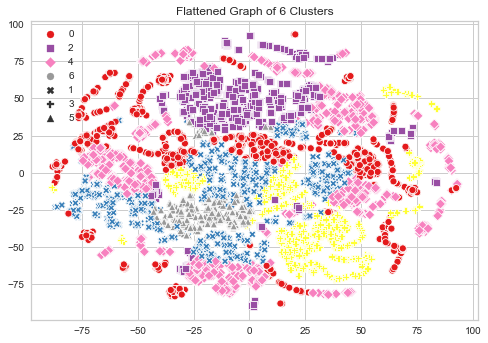

In [196]:
kmeans(feat_dt_scaled, 6)

# Recommendations